In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [13]:
data_dir = 'D:\DL\Dibates\CODE\Retainal'

In [14]:
Retainal=[]
for file in os.listdir(data_dir):
    Retainal+=[file]
print(Retainal)
print(len(Retainal))

['Mild', 'Moderate', 'Proliferate_DR', 'Severe']
4


In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split = 0.3)

In [16]:
train_data = train_datagen.flow_from_directory(data_dir, target_size = (128,128), batch_size = 15, class_mode = 'categorical',
                                        subset = 'training')

val_data = train_datagen.flow_from_directory(data_dir, target_size = (128,128), batch_size = 15, class_mode = 'categorical',
                                        subset = 'validation')

Found 1302 images belonging to 4 classes.
Found 555 images belonging to 4 classes.


In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation="softmax"))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 96)       

In [18]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(train_data, epochs = 70, verbose = 1,validation_data=val_data)

Epoch 1/70
87/87 [==============================] - 65s 714ms/step - loss: 1.2133 - accuracy: 0.5315 - val_loss: 1.2079 - val_accuracy: 0.5387
Epoch 2/70
87/87 [==============================] - 35s 406ms/step - loss: 1.2023 - accuracy: 0.5376 - val_loss: 1.1854 - val_accuracy: 0.5387
Epoch 3/70
87/87 [==============================] - 35s 406ms/step - loss: 1.1948 - accuracy: 0.5376 - val_loss: 1.2038 - val_accuracy: 0.5387
Epoch 4/70
87/87 [==============================] - 35s 404ms/step - loss: 1.1895 - accuracy: 0.5376 - val_loss: 1.1811 - val_accuracy: 0.5387
Epoch 5/70
87/87 [==============================] - 35s 397ms/step - loss: 1.1875 - accuracy: 0.5376 - val_loss: 1.1802 - val_accuracy: 0.5387
Epoch 6/70
87/87 [==============================] - 35s 398ms/step - loss: 1.1866 - accuracy: 0.5376 - val_loss: 1.1798 - val_accuracy: 0.5387
Epoch 7/70
87/87 [==============================] - 30s 338ms/step - loss: 1.1877 - accuracy: 0.5376 - val_loss: 1.1795 - val_accuracy: 0.5387

In [20]:
model.evaluate(val_data)
model.save('D:\DL\Dibates\CODE\models\CNN.h5')

37/37 [==============================] - 5s 127ms/step - loss: 1.4369 - accuracy: 0.5261


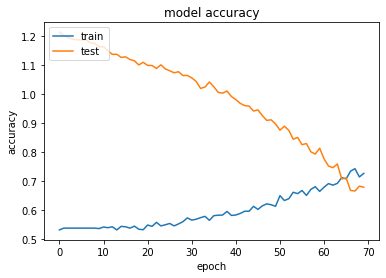

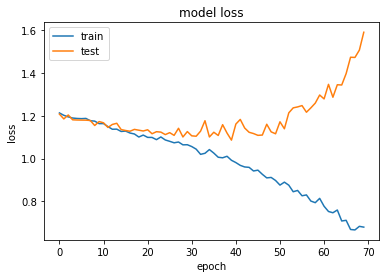

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
base_model1 = tf.keras.applications.MobileNet(input_shape=(128, 128, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model1)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(4, activation='sigmoid'))
model1.summary()

17235968/17225924 [==============================] - 9s 1us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                65600     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 3,294,980
Trainable params: 3,272,964
Non

In [23]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history1 = model1.fit(train_data, epochs = 70, verbose = 1,validation_data=val_data)

Epoch 1/70
87/87 [==============================] - 76s 828ms/step - loss: 1.5713 - accuracy: 0.3525 - val_loss: 1.5975 - val_accuracy: 0.5297
Epoch 2/70
87/87 [==============================] - 69s 797ms/step - loss: 1.2657 - accuracy: 0.4685 - val_loss: 1.5493 - val_accuracy: 0.5261
Epoch 3/70
87/87 [==============================] - 59s 682ms/step - loss: 1.1467 - accuracy: 0.5384 - val_loss: 2.0229 - val_accuracy: 0.4090
Epoch 4/70
87/87 [==============================] - 61s 704ms/step - loss: 1.1310 - accuracy: 0.5300 - val_loss: 1.5129 - val_accuracy: 0.5604
Epoch 5/70
87/87 [==============================] - 65s 742ms/step - loss: 1.0744 - accuracy: 0.5576 - val_loss: 1.3303 - val_accuracy: 0.5171
Epoch 6/70
87/87 [==============================] - 59s 673ms/step - loss: 0.9938 - accuracy: 0.6022 - val_loss: 2.0437 - val_accuracy: 0.4090
Epoch 7/70
87/87 [==============================] - 58s 671ms/step - loss: 0.9920 - accuracy: 0.5906 - val_loss: 1.3225 - val_accuracy: 0.5153

In [24]:
model.evaluate(val_data)
model.save('D:\DL\Dibates\CODE\models\MobileNet.h5')

37/37 [==============================] - 6s 146ms/step - loss: 1.5085 - accuracy: 0.5243


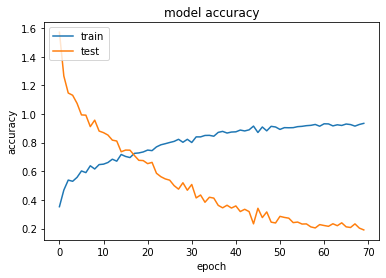

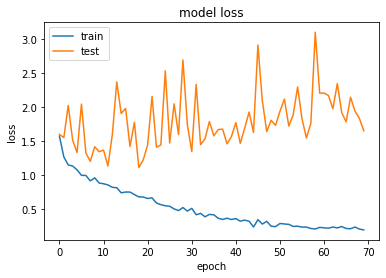

In [25]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[0.7911313  0.9949855  0.02156922 0.01834482]


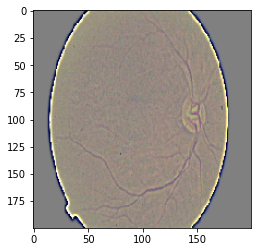

Prediction: Moderate


In [29]:
from skimage import io
from keras.preprocessing import image

img = image.load_img('D:/DL/Dibates/CODE/Retainal/Moderate/0c2e2369dfff.png', grayscale=False, target_size=(128,128))
show_img=image.load_img('D:/DL/Dibates/CODE/Retainal/Moderate/0c2e2369dfff.png', grayscale=False, target_size=(200, 200))
Retainal = Retainal
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Retainal[ind])